# Dataset: Imóveis em Boston

O objetivo deste notebook é 
- demonstrar uma leitura e análise inicial de um dataset visando
- encontrar eventuais inconsistências e 
- pré processá-lo para tornar mais adaptado ao uso de treinamento de uma rede neural.

Os dados processados são salvos em arquivo para ser lido posteriormente.

## Importação

In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
import os
from IPython.display import display

import numpy as np
import pandas as pd

## Obtendo os dados

In [ ]:
# --------------------------------------------------------------------------------
# Boston Housing Data Set
# -----------------------
# [https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
# --------------------------------------------------------------------------------

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)
bos = pd.DataFrame(boston.data)
print(bos.head())
bos.columns = boston.feature_names
print(bos.head())

print(boston.target.shape)

bos['PRICE'] = boston.target
print(bos.head())

print(bos.describe())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

In [12]:

Xtra = bos.drop('PRICE', axis = 1)
ytra = bos['PRICE']
print(Xtra.shape, ytra.shape)
#(506, 13) (506,)

(506, 13) (506,)


## Visualizando com pandas

In [13]:
Xpd, ypd = pd.DataFrame(Xtra), pd.DataFrame(ytra)
display(Xpd.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
display(ypd.head())

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Visualizando distribuição dos atributos via boxplot

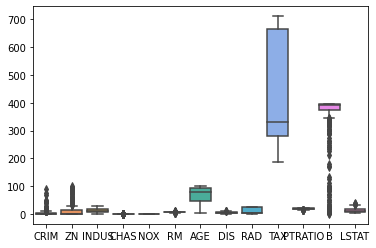

In [15]:
import seaborn as sns
sns.boxplot(data=Xtra);

## Normalizando os dados

Normaliza-se os dados para média zero e variância 1 por característica.

In [16]:
Xtra= Xtra.astype(np.float32)
ytra= ytra.values.reshape(-1, 1).astype(np.float32)

mean = Xtra.mean(axis=0)
Xtra -= mean
std = Xtra.std(axis=0)
Xtra /= std

n_samples, n_atributes = Xtra.shape
print('Shapes:', Xtra.shape, ytra.shape)
print('Data: min={:.3f}, mean={:.3f}, max={:.3f}, std={:.3f}'.format(Xtra.values.min(), Xtra.values.mean(), Xtra.values.max(), Xtra.values.std()))
print('Target: min={:.3f}, mean={:.3f}, max={:.3f}, std={:.3f}'.format(ytra.min(), ytra.mean(), ytra.max(), ytra.std()))


Shapes: (506, 13) (506, 1)
Data: min=-3.903, mean=-0.000, max=9.924, std=0.999
Target: min=5.000, mean=22.533, max=50.000, std=9.188


### Visualizando os dados normalizados com boxplot

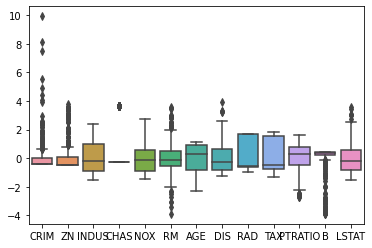

In [17]:
sns.boxplot(data=Xtra)

## Organização dos dados

Os dados de treinamento estão organizados em matrizes onde as linhas representam as amostras e as colunas os atributos. Neste exemplo a matriz X tem 404 linhas (amostras) e 13 colunas (atributos), de 0 a 12. Já a matriz alvo possui uma coluna e 404 linhas.

In [18]:
print('Treinamento:',Xtra.shape, ytra.shape)

Treinamento: (506, 13) (506, 1)


\begin{align*} 
\mathbf{X}_{train} & = \begin{bmatrix}
\longleftarrow & (\mathbf{x}^{(0)})^T & \longrightarrow \\ 
\longleftarrow & (\mathbf{x}^{(1)})^T & \longrightarrow \\ 
  & \vdots  & \\ 
\longleftarrow & (\mathbf{x}^{(m-1)})^T & \longrightarrow 
\end{bmatrix} = \begin{bmatrix}
x_0^{(0)} & x_1^{(0)} & x_2^{(0)} & \ldots & x_{11}^{(0)} \\
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \ldots & x_{11}^{(1)} \\
 &  & \vdots  & \\ 
x_0^{(403)} & x_1^{(403)} & x_2^{(403)} & \ldots & x_{11}^{(403)}
\end{bmatrix} \\
\\
\mathbf{y}_{train} & = \begin{bmatrix}
y^{(0)} \\
y^{(1)} \\
\vdots  \\ 
y^{(403)} \\
\end{bmatrix}
\end{align*}


## Salvando os dados no diretório data para uso futuro

Utiliza-se a função `savez` para salvar vários arrays do NumPy num único arquivo, para posterior leitura.

In [19]:
os.makedirs('data/',exist_ok=True)
np.savez('data/boston_housing_normalize', Xtra=Xtra, ytra=ytra)

In [20]:
!ls data/

boston_housing_normalize.npz


## Testando a leitura

In [24]:
data = np.load('data/boston_housing_normalize.npz')
data.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f9fc1b8f290>)

In [22]:
Xtra_n, ytra_n = data['Xtra'], data['ytra']
np.array_equal(Xtra_n,Xtra) 

True

## Regressão Linear

Vamos calcular uma regressão linear simples, para termos uma ideia do valor do custo. 

$$ \mathbf{\hat{y}} = \mathbf{X} \cdot \mathbf{W} $$

Utilizamos a *equação normal* para calcular os pesos:

$$  \mathbf{W} =(\mathbf{X}^T \mathbf{X})^{−1}\mathbf{X}^T \mathbf{y} $$

O MSE (Mean Square Error) - Erro médio quadrático é dado pela média do erro quadrático $E^2$: 

$$ E^2 = (\mathbf{\hat{y}} - \mathbf{y})^2 $$

In [25]:
W = np.linalg.inv((Xtra.T).dot(Xtra)).dot(Xtra.T).dot(ytra)

mse_train = np.mean(np.square(np.dot(Xtra, W) - ytra))

print('MSE train: {:.3f}'.format(mse_train))

MSE train: 529.620


# Exercício

1. Depois de normalizado, divida os dados em 80% para conjunto de 
treinamento e 20% para conjunto de validação e salve os dois conjuntos no
arquivo 'data/boston_housing_normalize_tra_val.npz'. Dica, https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

# Aprendizados
